In [13]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
from localenv import fda_api_key

%matplotlib inline

In [14]:
def format_url(base_url,search_fields,count_fields):
    return f"{base_url}api_key={fda_api_key}&search={search_fields}&count={count_fields}"

In [15]:
base_url = 'https://api.fda.gov/drug/event.json?'

#Search for Number of deaths by gender in prescription drugs
search_fields ='receivedate:[20090101+TO+20161231]+AND+occurcountry:US+AND+'\
               'patient.drug.openfda.product_type.exact:\"HUMAN+PRESCRIPTION+DRUG\"+AND+seriousnessdeath:1'
    
print(search_fields)
count_fields = 'patient.patientsex'
target_url = format_url(base_url,search_fields,count_fields)

print(target_url)

receivedate:[20090101+TO+20161231]+AND+occurcountry:US+AND+patient.drug.openfda.product_type.exact:"HUMAN+PRESCRIPTION+DRUG"+AND+seriousnessdeath:1
https://api.fda.gov/drug/event.json?api_key=0lYxljicOBvelBsVCqCEdMAUzWDKB1eBVSESZjrx&search=receivedate:[20090101+TO+20161231]+AND+occurcountry:US+AND+patient.drug.openfda.product_type.exact:"HUMAN+PRESCRIPTION+DRUG"+AND+seriousnessdeath:1&count=patient.patientsex


In [16]:
response= requests.get(target_url).json()
print(json.dumps(response, sort_keys=True, indent=4, separators=(',', ': ')))

{
    "meta": {
        "disclaimer": "Do not rely on openFDA to make decisions regarding medical care. While we make every effort to ensure that data is accurate, you should assume all results are unvalidated. We may limit or otherwise restrict your access to the API in line with our Terms of Service.",
        "last_updated": "2018-03-19",
        "license": "https://open.fda.gov/license/",
        "terms": "https://open.fda.gov/terms/"
    },
    "results": [
        {
            "count": 80616,
            "term": 1
        },
        {
            "count": 77408,
            "term": 2
        },
        {
            "count": 3287,
            "term": 0
        }
    ]
}


In [17]:
# Loop through all results
gender_results = [] 
gender_dict = { 1:'Male',
                2:'Female',
                0:'Unknown'
              }
for gender_data in response['results']:
    gender_results.append({'Gender':gender_dict[gender_data.get('term')],
                            'Count':gender_data.get('count')
                          })
    
print(gender_results)


[{'Gender': 'Male', 'Count': 80616}, {'Gender': 'Female', 'Count': 77408}, {'Gender': 'Unknown', 'Count': 3287}]


In [18]:
pd_deaths_gender = pd.DataFrame.from_dict(gender_results)
pd_deaths_gender


,Count,Gender
0,80616,Male
1,77408,Female
2,3287,Unknown


In [19]:
# Calculate Type Percents
total_deaths = pd_deaths_gender['Count'].sum()
gender_percentages=round((pd_deaths_gender['Count'] / total_deaths) * 100, 2)
gender_percentages
print(len(gender_percentages))

3


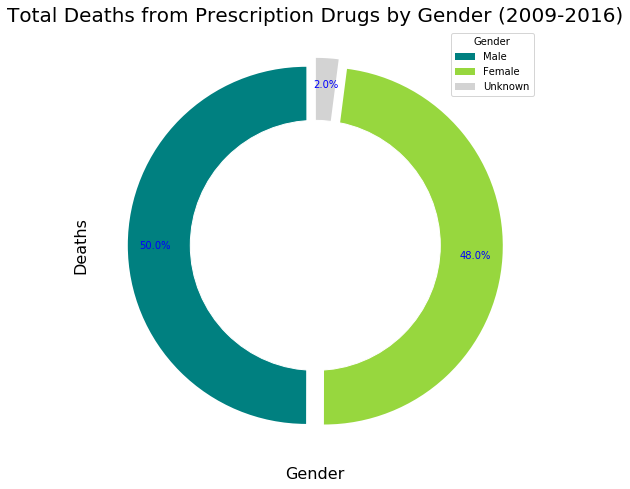

In [20]:
# Build Pie Chart
fig1, ax = plt.subplots(figsize=(8,8))
my_circle = plt.Circle((0,0), 0.7, color="white")
ax.axis("equal")
explode = [0.05] * len(gender_percentages)


plt.title("Total Deaths from Prescription Drugs by Gender (2009-2016)",size=20)
#pieplot

gender_pieplt, texts, autotexts = ax.pie(gender_percentages, autopct="%1.1f%%",  colors=("teal","#97d73eff","lightgray"), 
                                       explode=explode, startangle=90, pctdistance=0.85)

#ax.set_title("Deaths by Gender due to prescribed drugs")
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.xlabel("Gender", size=16)
plt.ylabel("Deaths", size= 16)
# Create a legend

# Create a legend
lgnd = plt.legend(fontsize="medium", mode="Expanded", 
                  numpoints=1,  labels=pd_deaths_gender['Gender'],
                  loc="best", title="Gender", 
                  labelspacing=0.5, fancybox=True)

autotexts[0].set_color('blue')
autotexts[1].set_color('blue')
autotexts[2].set_color('blue')

fig1.savefig("DeathsAgeGroupPrescription.png")
# Show Figure
plt.show()



In [21]:
count_fields = 'patient.patientagegroup'
target_url = format_url(base_url,search_fields,count_fields)

print(target_url)

https://api.fda.gov/drug/event.json?api_key=0lYxljicOBvelBsVCqCEdMAUzWDKB1eBVSESZjrx&search=receivedate:[20090101+TO+20161231]+AND+occurcountry:US+AND+patient.drug.openfda.product_type.exact:"HUMAN+PRESCRIPTION+DRUG"+AND+seriousnessdeath:1&count=patient.patientagegroup


In [23]:
response= requests.get(target_url).json()
print(json.dumps(response, sort_keys=True, indent=4, separators=(',', ': ')))

{
    "meta": {
        "disclaimer": "Do not rely on openFDA to make decisions regarding medical care. While we make every effort to ensure that data is accurate, you should assume all results are unvalidated. We may limit or otherwise restrict your access to the API in line with our Terms of Service.",
        "last_updated": "2018-03-19",
        "license": "https://open.fda.gov/license/",
        "terms": "https://open.fda.gov/terms/"
    },
    "results": [
        {
            "count": 15439,
            "term": 6
        },
        {
            "count": 10047,
            "term": 5
        },
        {
            "count": 157,
            "term": 3
        },
        {
            "count": 128,
            "term": 2
        },
        {
            "count": 108,
            "term": 4
        },
        {
            "count": 102,
            "term": 1
        }
    ]
}


In [24]:
# Loop through all results
group_age_results = [] 
group_age_dict = { 1:'Neonate',
                   2:'Infant',
                   3:'Child',
                   4:'Adolescent',
                   5:'Elderly',
                   6:'Adult'
                 }
for age_data in response['results']:
    group_age_results.append({'Age Group': group_age_dict[age_data.get('term')],
                              'Total Deaths' : age_data.get('count')
                             })
    
print(group_age_results)

pd_age_category = pd.DataFrame.from_dict(group_age_results)
pd_age_category

[{'Age Group': 'Adult', 'Total Deaths': 15439}, {'Age Group': 'Elderly', 'Total Deaths': 10047}, {'Age Group': 'Child', 'Total Deaths': 157}, {'Age Group': 'Infant', 'Total Deaths': 128}, {'Age Group': 'Adolescent', 'Total Deaths': 108}, {'Age Group': 'Neonate', 'Total Deaths': 102}]


,Age Group,Total Deaths
0,Adult,15439
1,Elderly,10047
2,Child,157
3,Infant,128
4,Adolescent,108
5,Neonate,102


In [25]:
# Calculate Age Category Percents
total_deaths_age = pd_age_category['Total Deaths'].sum()
age_group_percentages=round((pd_age_category['Total Deaths'] / total_deaths_age) * 100, 2)

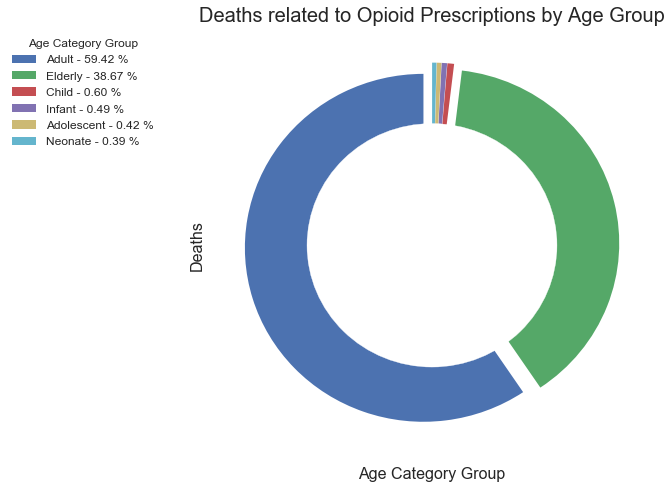

In [26]:
#x_axis = np.arange(pd_age_category['Count'].max() + 100, 250)
x = pd_age_category['Age Group']
y = np.array(pd_age_category['Total Deaths'])
sns.set(color_codes=True)
explode = [0.05] * len(age_group_percentages)
fig2, ax2 = plt.subplots(figsize=(8,8))
my_circle1 = plt.Circle((0,0), 0.7, color="white")


patches, texts = ax2.pie(age_group_percentages, explode=explode, startangle=90, pctdistance=0.85)

#ax.set_title("Deaths by Gender due to prescribed drugs")
p=plt.gcf()
p.gca().add_artist(my_circle1)
plt.title("Deaths related to Opioid Prescriptions by Age Group", size = 20)
plt.xlabel("Age Category Group", size=16)
plt.ylabel("Deaths", size=16)

# Create a legend
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, age_group_percentages)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=12, title='Age Category Group', fancybox=True)

plt.savefig('piechart.png', bbox_inches='tight')


ax2.set_autoscale_on(True)

fig2 = ax2.get_figure()
fig2.savefig("DeathsAgeGroupPrescription.png")


In [27]:
search_fields ='receivedate:[20090101+TO+20161231]+AND+occurcountry:US+AND+'\
               'patient.drug.openfda.product_type.exact:\"HUMAN+PRESCRIPTION+DRUG\"'

count_fields = 'patient.reaction.reactionmeddrapt.exact'
target_url = format_url(base_url,search_fields,count_fields)
print(target_url)

https://api.fda.gov/drug/event.json?api_key=0lYxljicOBvelBsVCqCEdMAUzWDKB1eBVSESZjrx&search=receivedate:[20090101+TO+20161231]+AND+occurcountry:US+AND+patient.drug.openfda.product_type.exact:"HUMAN+PRESCRIPTION+DRUG"&count=patient.reaction.reactionmeddrapt.exact


In [28]:
response= requests.get(target_url).json()


In [29]:
adverse_reaction = []

for reaction_data in response['results']:
    adverse_reaction.append({'Reaction': str.title(reaction_data.get('term')),
                              'Total' : reaction_data.get('count')
                             })
    



pd_adverse_reaction = pd.DataFrame.from_dict(adverse_reaction)

In [30]:
#file_df["avg_cost"] = file_df["avg_cost"].map(dollar_round2)
# file_df["avg_cost"] = file_df["avg_cost"].map("${:.2f}".format)
#pd_adverse_reaction['Reaction'] = pd_adverse_reaction['Reaction'].map(str.lower(pd_adverse_reaction['Reaction'].values()))
pd_adverse_reaction.sort_values(by="Total", ascending=False, inplace=True)
pd_adverse_reaction.head(10)


,Reaction,Total
0,Drug Ineffective,179742
1,Fatigue,120280
2,Nausea,114277
3,Headache,98958
4,Death,95218
5,Pain,94394
6,Diarrhoea,81416
7,Dyspnoea,75482
8,Malaise,73328
9,Off Label Use,73077


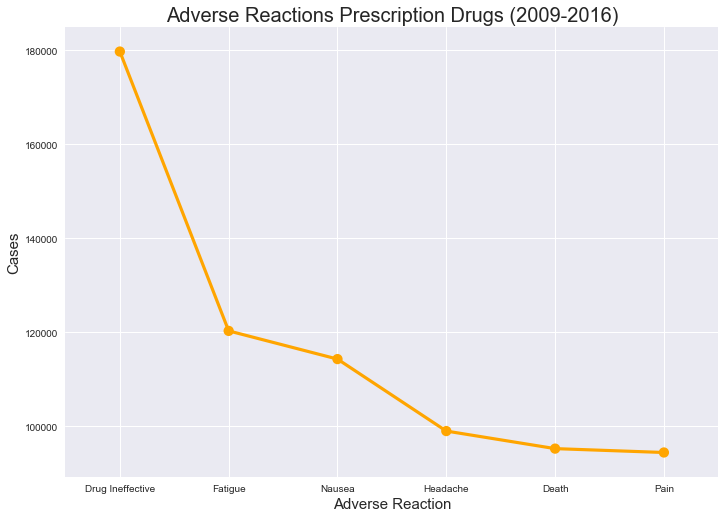

In [31]:
summary_df = pd_adverse_reaction.head(6)
fig, ax = plt.subplots(figsize=(12,12))
fig.set_size_inches(11.7,8.27)
sns.pointplot(x="Reaction",
            y="Total",
            data=summary_df,
            color="orange")
plt.grid(linestyle="solid")
plt.xlabel("Adverse Reaction", size = 15)
plt.ylabel("Cases", size = 15)
plt.title ("Adverse Reactions Prescription Drugs (2009-2016)", size=20)
fig = ax.get_figure()
fig.savefig("AdverseReactionsPrescriptionDrugs.png")